In [2]:
!pip install mplcyberpunk

# <p style="background-color:#a782ec;font-family:newtimeroman;color:#74006f;font-size:150%;text-align:center;border-radius:20px 40px;">SPACESHIP TITANIC</p>

<h1 align='center'>Introduction 📝</h1>
The goal of the competition is to predict whether a passenger was transported to an alternate dimension during the Spaceship Titanic's collision with the spacetime anomaly.This notebook will contain almost all the necessary steps and methods which will be helpful in this competition.

<h1 align='center'>Dataset Info 📈</h1>
<b>Columns of the train data-</b> 

* ```PassengerId``` - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.
* ```HomePlanet``` - The planet the passenger departed from, typically their planet of permanent residence.
* ```CryoSleep``` - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
* ```Cabin``` - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
* ```Destination``` - The planet the passenger will be debarking to.
* ```Age``` - The age of the passenger.
* ```VIP``` - Whether the passenger has paid for special VIP service during the voyage.
* ```RoomService, FoodCourt, ShoppingMall, Spa, VRDeck``` - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
* ```Name``` - The first and last names of the passenger.
* ```Transported``` -  Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.

<h1 align='center'>Evaluation Metric 📐</h1>
Submissions are evaluated based on their classification accuracy, the percentage of predicted labels that are correct.

<img src='https://miro.medium.com/max/1400/1*Ymyg5nHVy-FG429oMkKHkA.jpeg' width=600px>

<div class="alert alert-block alert-warning">
    <h2 align='center'>Please consider upvoting the kernel if you found it useful.</h2>
</div>

# <p style="background-color:#a782ec;font-family:newtimeroman;color:#74006f;font-size:150%;text-align:center;border-radius:20px 40px;">TABLE OF CONTENTS</p>
<ul style="list-style-type:square">
    <li><a href="#1">Importing Libraries</a></li>
    <li><a href="#2">Reading the data</a></li>
    <li><a href="#3">Exploratory Data Analysis</a></li>
    <ul style="list-style-type:disc">
        <li><a href="#3.1">Missing Values</a></li>
        <li><a href="#3.2">Transported</a></li>
        <li><a href="#3.3">PassengerId</a></li>
        <li><a href="#3.4">HomePlanet</a></li>
        <li><a href="#3.5">CyroSleep</a></li>
        <li><a href="#3.6">Cabin</a></li>
        <li><a href="#3.7">Destination</a></li>
        <li><a href="#3.8">VIP</a></li>
        <li><a href="#3.9">Age</a></li>
        <li><a href="#3.10">RoomService, FoodCourt, ShoppingMall, Spa, VRDeck</a></li>
    </ul>
    <li><a href="#4">Data Pre-Processing</a></li>
    <ul style="list-style-type:disc">
        <li><a href="#4.1"> Handling Missing Values</a></li>
        <li><a href="#4.2">Dropping columns</a></li>
        <li><a href="#4.3">Encoding</a></li>
        <li><a href="#4.4">Splitting the data</a></li>
    </ul>
</ul>

<a id='1'></a>
# <p style="background-color:#a782ec;font-family:newtimeroman;color:#74006f;font-size:150%;text-align:center;border-radius:20px 40px;">IMPORTING LIBRARIES</p>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mplcyberpunk
from termcolor import colored
plt.style.use('cyberpunk')

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import warnings
warnings.simplefilter('ignore')

<a id='2'></a>
# <p style="background-color:#a782ec;font-family:newtimeroman;color:#74006f;font-size:150%;text-align:center;border-radius:20px 40px;">READING THE DATA</p>

In [4]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [5]:
df_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [6]:
df_test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [7]:
print(colored(f'Number of rows in train data: {df_train.shape[0]}', 'red'))
print(colored(f'Number of columns in train data: {df_train.shape[1]}', 'red'))
print(colored(f'Number of rows in test data: {df_test.shape[0]}', 'blue'))
print(colored(f'Number of columns in test data: {df_test.shape[1]}', 'blue'))

Number of rows in train data: 8693
Number of columns in train data: 14
Number of rows in test data: 4277
Number of columns in test data: 13


In [8]:
df_train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [9]:
df_test.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,4186.000000,4195.000000,4171.000000,4179.000000,4176.000000,4197.000000
mean,28.658146,219.266269,439.484296,177.295525,303.052443,310.710031
std,14.179072,607.011289,1527.663045,560.821123,1117.186015,1246.994742
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.000000,53.000000,78.000000,33.000000,50.000000,36.000000
max,79.000000,11567.000000,25273.000000,8292.000000,19844.000000,22272.000000


<a id='3'></a>
# <p style="background-color:#a782ec;font-family:newtimeroman;color:#74006f;font-size:150%;text-align:center;border-radius:20px 40px;">EXPLORATORY DATA ANALYSIS</p>
### We perform EDA to analyse and gain insights of the data which will help in better understanding the problem and will bring an advantage when creating models.

<a id='3.1'></a>
## 1. Missing Values
### First of all, we will start by analying the missing values in the dataset. 

Missing values column wise -
PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64


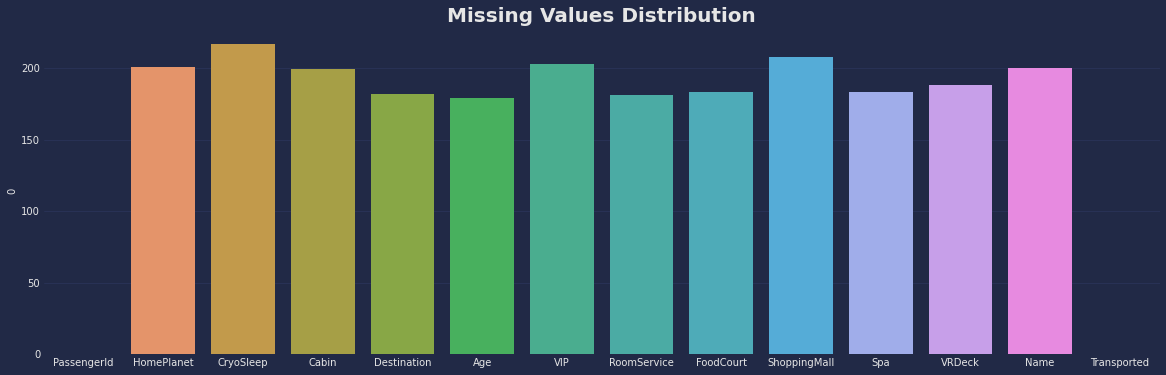

In [9]:
plt.figure(figsize=(20,6))

na = pd.DataFrame(df_train.isna().sum())

sns.barplot(y=na[0], x=na.index)
plt.title('Missing Values Distribution', size = 20, weight='bold')
print(colored("Missing values column wise -", 'magenta'))
print(colored(df_train.isna().sum(), 'magenta'))

plt.show()

<h2><u>INSIGHTS FROM THE GRAPH</u></h2>

* We can observe that almost all the columns have Null values. This is a problem that can be solved in multiple ways depeding on the situation which will we see later.
* Let us also analyse how much these Null values of each column affects Transported.

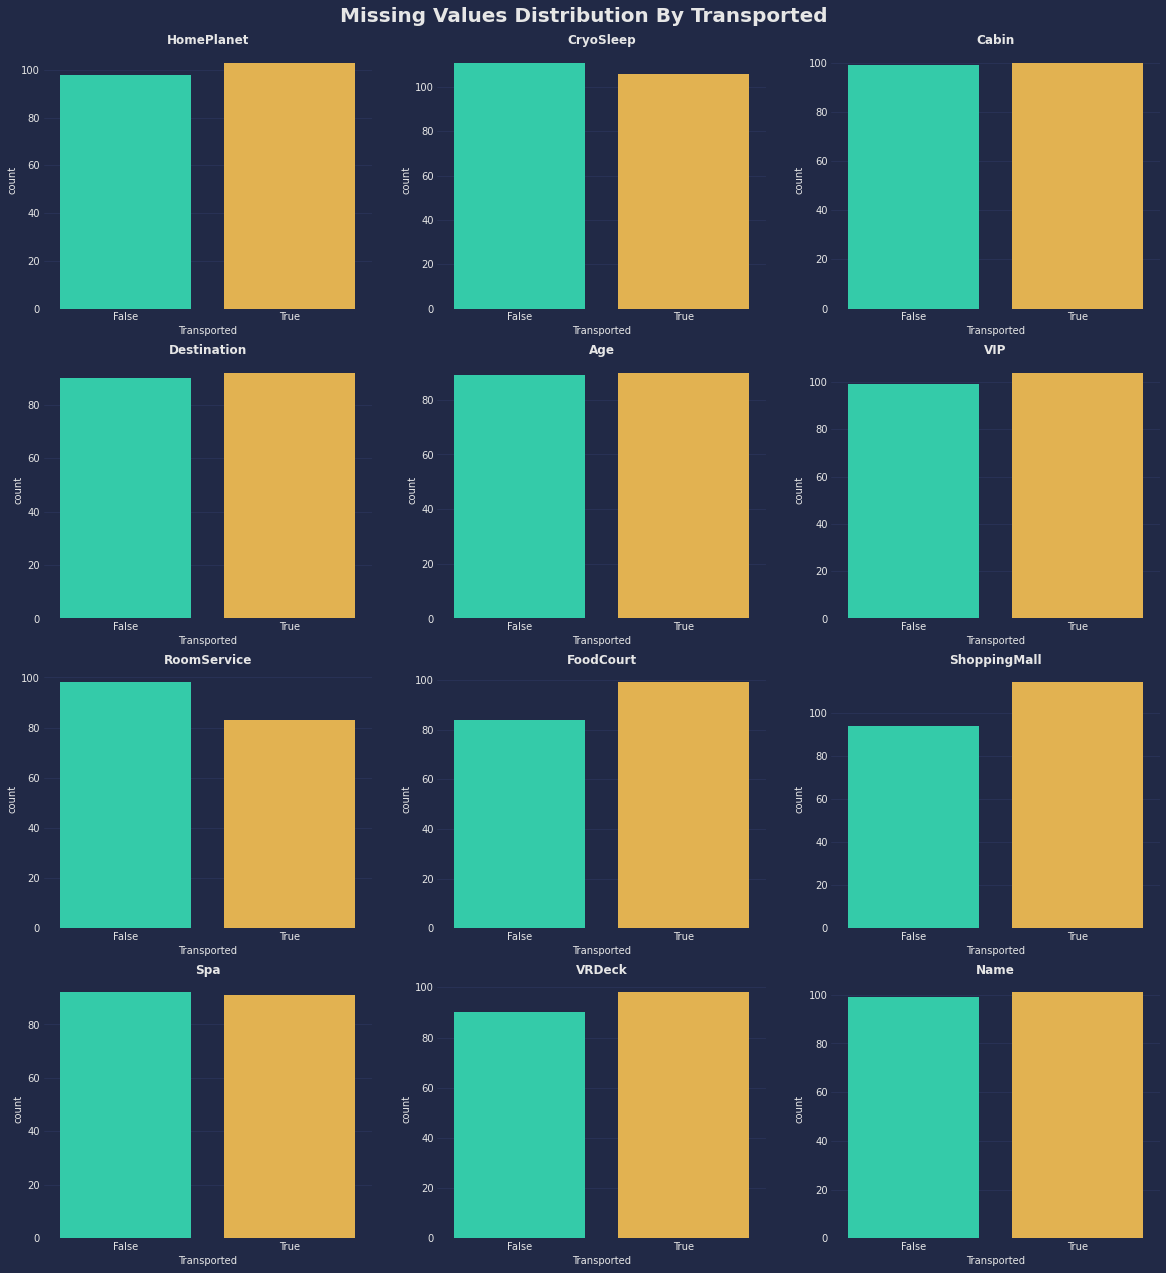

In [10]:
fig, ax = plt.subplots(4, 3, figsize=(20, 20))
fig.suptitle("Missing Values Distribution By Transported", size = 20, weight='bold')
fig.subplots_adjust(top=0.95)
i = 0
for x in df_train.columns:
    if len(df_train[df_train[x].isna()==True])>0:
        sns.countplot(x='Transported', data=df_train[df_train[x].isna()==True], ax=fig.axes[i], palette='turbo')
        fig.axes[i].set_title(x, weight='bold')
        i += 1
        
plt.show()

<h2><u>INSIGHTS FROM THE GRAPH</u></h2>

* We can observe that all the columns have almost equal distribution of target class. 
* So one thing we can say that even if we drop rows with missing values according to a particular column, it would not create any bias in the data(but we will not drop the rows right now).

<a id='3.2'></a>
## 2. Transported
### Transported is the target column which we have to predict. Let us analyse its distribution.

Percentage of Passengers Transported - 50.36%
Percentage of Passengers Not Transported - 49.64%


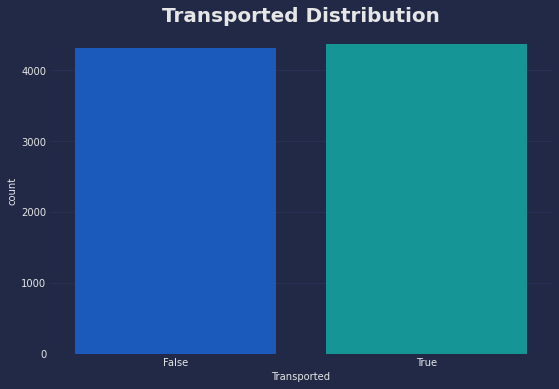

In [11]:
plt.figure(figsize=(9,6))

sns.countplot(x='Transported', data=df_train, palette = 'winter')
plt.title("Transported Distribution", size = 20, weight='bold')

print(colored(f"Percentage of Passengers Transported - {(len(df_train[df_train['Transported']==True]) / df_train.shape[0])*100:.2f}%", 'cyan'))
print(colored(f"Percentage of Passengers Not Transported - {(len(df_train[df_train['Transported']==False]) / df_train.shape[0])*100:.2f}%", 'cyan'))

plt.show()

<h2><u>INSIGHTS FROM THE GRAPH</u></h2>

* We can observe that the target column is almost perfectly balanced, so we don't have to worry about unequal distribution.

<a id='3.3'></a>
## 3. PassengerId
All the passengers have unique id so we can't use this feature directly for modelling. But we will not discard this feature as we can perform some feature engineering to extract useful information from it. Also it does not contain any null values so extracting features from it might be very helpful.

Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group, so we can get to know the size of the group and can check how it affects Transported.

Number of unique groups - 6217
Group Size Distribution - 
   GroupSize  Count
0          1   4805
1          2    841
2          3    340
3          4    103
4          5     53
5          7     33
6          6     29
7          8     13


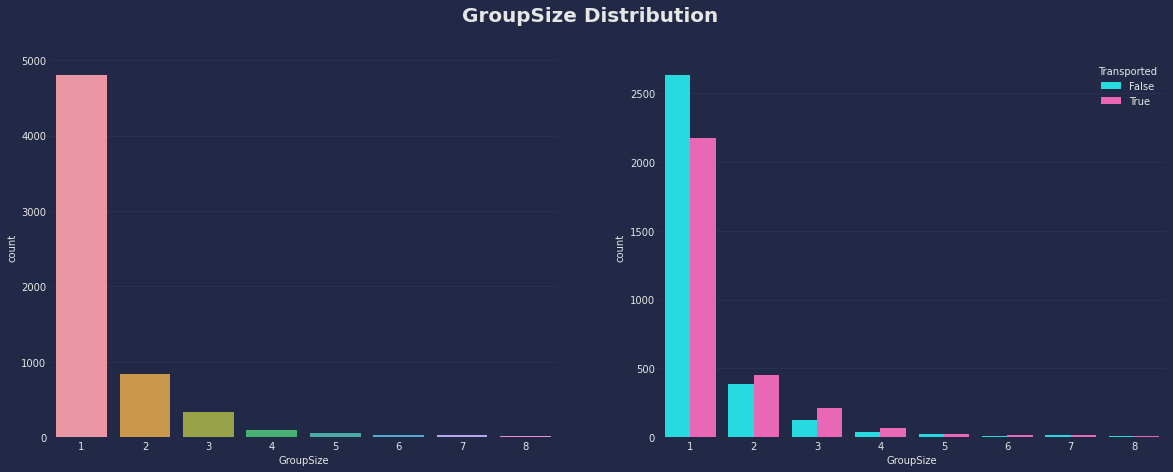

Total number of individual passengers - 4805
Number of individual passengers transported - 2174
Number of individual passengers not transported - 2631
Toal number of non individual passengers - 1412
Number of non individual passengers transported - 803
Number of non individual passengers not transported - 609


In [12]:
fig, ax = plt.subplots(1, 2, figsize=(20,7))
fig.suptitle("GroupSize Distribution", size = 20, weight='bold')

df_train['Group'] = df_train['PassengerId'].apply(lambda x: x.split('_')[0]).astype(int)
df_train['GroupSize']=df_train['Group'].map(lambda x: df_train['Group'].value_counts()[x])

df_temp = df_train.drop_duplicates(subset = ["Group"], keep='last')

sns.countplot(x='GroupSize', data=df_temp, ax=ax[0])
sns.countplot(x='GroupSize', data=df_temp, hue='Transported', ax=ax[1])

print(colored(f"Number of unique groups - {len(df_temp)}",'blue'))
data = pd.DataFrame(df_temp['GroupSize'].value_counts()).reset_index().rename(columns={'index': 'GroupSize', 'GroupSize':'Count'})
print(colored("Group Size Distribution - ",'blue'))
print(colored(data, 'blue'))
plt.show()

print(colored(f"Total number of individual passengers - {len(df_temp[df_temp['GroupSize']==1])}", 'blue'))
print(colored(f"Number of individual passengers transported - {len(df_temp[(df_temp['GroupSize']==1) & (df_temp['Transported']==True)])}", 'blue'))
print(colored(f"Number of individual passengers not transported - {len(df_temp[(df_temp['GroupSize']==1) & (df_temp['Transported']==False)])}", 'blue'))
print(colored(f"Toal number of non individual passengers - {len(df_temp[df_temp['GroupSize']!=1])}", 'red'))
print(colored(f"Number of non individual passengers transported - {len(df_temp[(df_temp['GroupSize']!=1) & (df_temp['Transported']==True)])}", 'red'))
print(colored(f"Number of non individual passengers not transported - {len(df_temp[(df_temp['GroupSize']!=1) & (df_temp['Transported']==False)])}", 'red'))

<h2><u>INSIGHTS FROM THE GRAPH</u></h2>

* We can observe that most of the passengers are individual passengers. 
* Apart from that the maximum size of the group is 8. 
* An interesting observation is that there is lesser chance of passenger to be transported if he/she is an individual than in a group.

<a id='3.4'></a>
## 4. HomePlanet
<b> This is one of the categorical feature. There are 3 unique values and this feature contains some null values which we need to take care but first let's check its distribution and dependence on Transported.</b>

HomePlanet Distribution - 
  HomePlanet  Count
0      Earth   4602
1     Europa   2131
2       Mars   1759


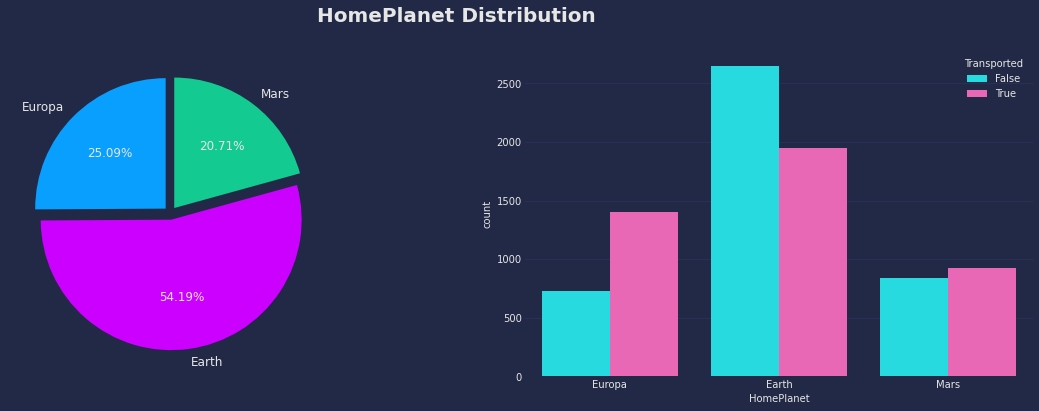

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(20,6))
fig.suptitle('HomePlanet Distribution', size = 20, weight='bold')

sizes = list(df_train['HomePlanet'].value_counts(sort=False))

labels = df_train['HomePlanet'].dropna().unique()
colors = ['#099FFF', '#CC00FF', '#13CA91']
explode = (0.05,0.05,0.05) 

ax[0].pie(sizes, colors=colors, explode=explode, startangle=90, labels=labels,
       autopct='%1.2f%%', pctdistance=0.6,textprops={'fontsize':12})
sns.countplot(x='HomePlanet', data=df_train, hue='Transported', ax=ax[1])

print(colored("HomePlanet Distribution - ",'green'))
data = pd.DataFrame(df_train['HomePlanet'].value_counts()).reset_index().rename(columns={'index': 'HomePlanet', 'HomePlanet':'Count'})
print(colored(data, 'green'))

plt.show()

<h2><u>INSIGHTS FROM THE GRAPH</u></h2>

* We can observe that most of the passengers are from Earth. 
* There is a higher chance of residents from Europa to be transported than others.
* The chances of the residents of Earth of getting transported is less.
* There is equal probability for the residents of Mars.

<a id='3.5'></a>
## 5. CyroSleep
<b>This is another categorical feature with value either True or False and this feature contains maximum null values which we need to take care but first let's check its distribution and dependence on Transported.</b>

CryoSleep Distribution - 
   CryoSleep  Count
0      False   5439
1       True   3037


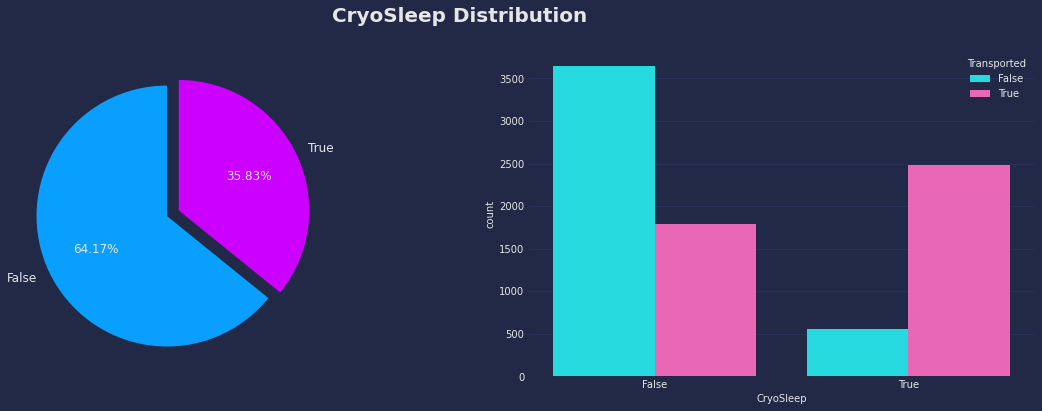

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(20,6))
fig.suptitle('CryoSleep Distribution', size = 20, weight='bold')

sizes = list(df_train['CryoSleep'].value_counts())

labels = df_train['CryoSleep'].dropna().unique()
colors = ['#099FFF', '#CC00FF']
explode = (0.05,0.05) 

ax[0].pie(sizes, colors=colors, explode=explode, startangle=90, labels=labels,
       autopct='%1.2f%%', pctdistance=0.6,textprops={'fontsize':12})
sns.countplot(x='CryoSleep', data=df_train, hue='Transported', ax=ax[1])

print(colored("CryoSleep Distribution - ",'magenta'))
data = pd.DataFrame(df_train['CryoSleep'].value_counts()).reset_index().rename(columns={'index': 'CryoSleep', 'CryoSleep':'Count'})
print(colored(data, 'magenta'))

plt.show()

<h2><u>INSIGHTS FROM THE GRAPH</u></h2>

* We can observe that CyroSleep has a high false percentage. 
* One of the best thing is that this feature has a direct relationship with the Transported. 
* If CyroSleep is False, then the chances of Transported is less (Transported=False) whereas if CyroSleep is True, then the chances of Transported is high (Transported=True).

<a id='3.6'></a>
## 6. Cabin
Just like PassengerId, we can't directly use Cabin feature. But we will not discard this feature as we can perform some feature engineering to extract useful information from it. 

Each cabin takes the form deck/num/side, where there are 8 unique deck values and side can be either P for Port or S for Starboard. So we can extract these features to know their distribution and can check how it affects Transported.

Cabin Deck Distribution - 
  Deck  Count
0    F   2794
1    G   2559
2    E    876
3    B    779
4    C    747
5    D    478
6    A    256
7    Z    199
8    T      5
Cabin Side Distribution - 
  Side  Count
0    S   4288
1    P   4206
2    Z    199


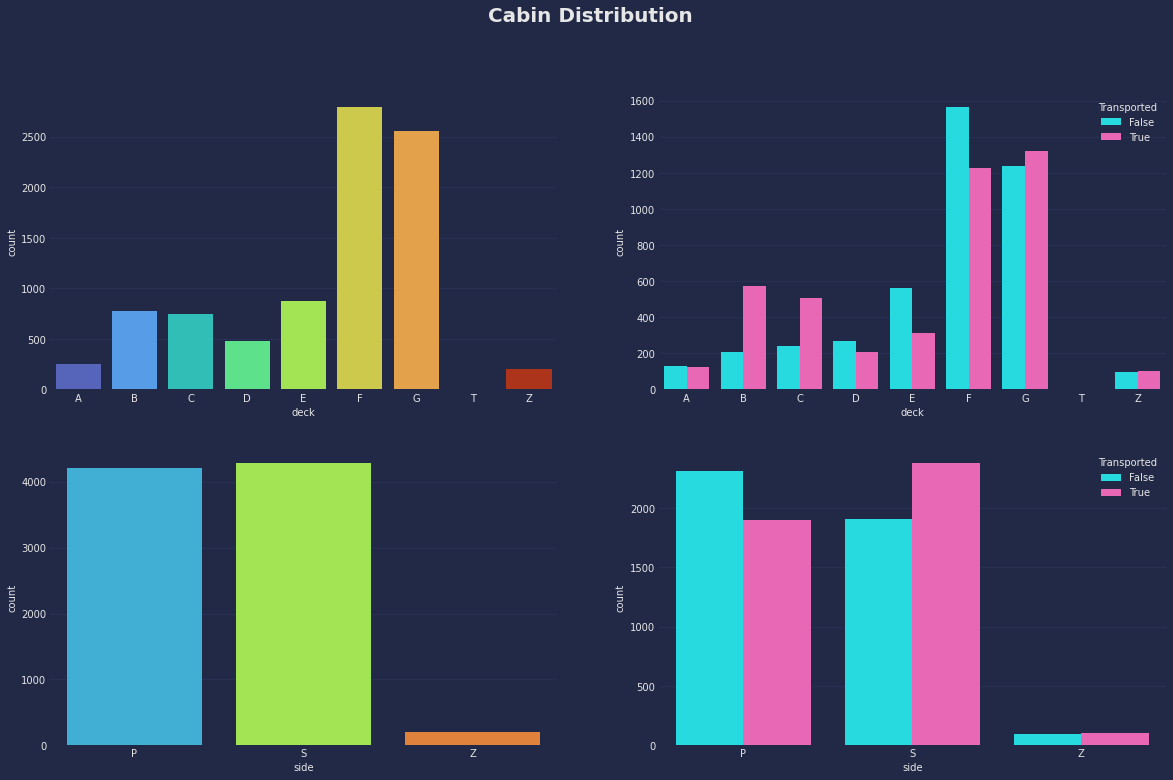

In [15]:
df_train['Cabin'].fillna('Z/9999/Z', inplace=True)
df_train['deck'] = df_train['Cabin'].apply(lambda x : x.split('/')[0])
df_train['side'] = df_train['Cabin'].apply(lambda x : x.split('/')[2])

fig, ax = plt.subplots(2, 2, figsize=(20,12))
fig.suptitle('Cabin Distribution', size = 20, weight='bold')

sns.countplot(x='deck', data=df_train, order=['A','B','C','D','E','F','G','T','Z'], ax=ax[0][0], palette='turbo')
sns.countplot(x='deck', data=df_train, order=['A','B','C','D','E','F','G','T','Z'], hue='Transported', ax=ax[0][1])

sns.countplot(x='side', data=df_train, ax=ax[1][0], palette='turbo')
sns.countplot(x='side', data=df_train, hue='Transported', ax=ax[1][1])

print(colored("Cabin Deck Distribution - ",'red'))
data = pd.DataFrame(df_train['deck'].value_counts()).reset_index().rename(columns={'index': 'Deck', 'deck':'Count'})
print(colored(data, 'red'))

print(colored("Cabin Side Distribution - ",'blue'))
data = pd.DataFrame(df_train['side'].value_counts()).reset_index().rename(columns={'index': 'Side', 'side':'Count'})
print(colored(data, 'blue'))

plt.show()

<h2><u>INSIGHTS FROM THE GRAPH</u></h2>

* The distribution of deck is very unequal whereas there is an almost equal distribution of side.
* Also, there are only 5 samples of deck 'T'.
* Apart from that, there is no proper conclusion on how the deck affects Transported as few classes have almost equal distribution whereas some has huge difference.
* But if you look at the Cabin's Side, you’ll notice that passenger with side 'S' has higher chance of getting transported than side 'P'.

<a id='3.7'></a>
## 7. Destination
<b> This is also a categorical feature. There are 3 unique values and this feature also contains some null values which we need to take care but first let's check its distribution and dependence on Transported.</b>

Destination Distribution - 
     Destination  Count
0    TRAPPIST-1e   5915
1    55 Cancri e   1800
2  PSO J318.5-22    796


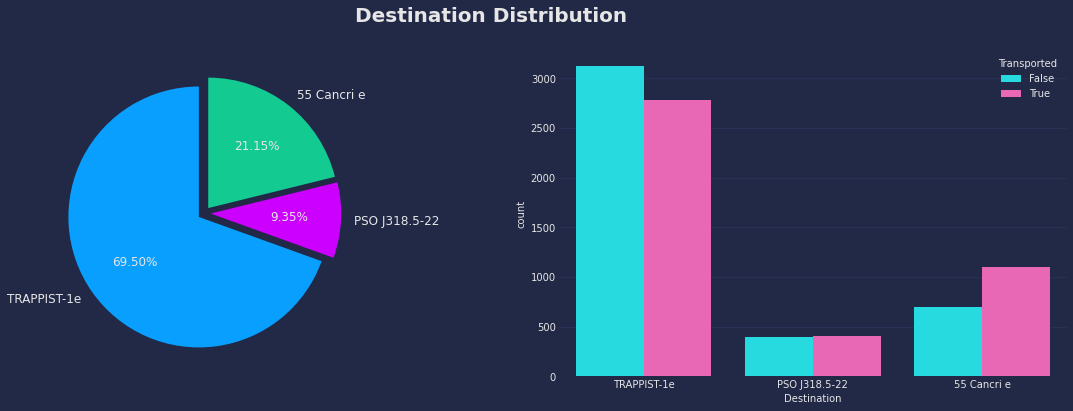

In [16]:
fig, ax = plt.subplots(1, 2, figsize=(20,6))
fig.suptitle('Destination Distribution', size = 20, weight='bold')

sizes = list(df_train['Destination'].value_counts(sort=False))

labels = df_train['Destination'].dropna().unique()
colors = ['#099FFF', '#CC00FF', '#13CA91']
explode = (0.05,0.05,0.05) 

ax[0].pie(sizes, colors=colors, explode=explode, startangle=90, labels=labels,
       autopct='%1.2f%%', pctdistance=0.6,textprops={'fontsize':12})
sns.countplot(x='Destination', data=df_train, hue='Transported', ax=ax[1])

print(colored("Destination Distribution - ",'cyan'))
data = pd.DataFrame(df_train['Destination'].value_counts()).reset_index().rename(columns={'index': 'Destination', 'Destination':'Count'})
print(colored(data, 'cyan'))

plt.show()

<h2><u>INSIGHTS FROM THE GRAPH</u></h2>

* We can observe that most of the passenger's destination is TRAPPIST-1e.
* Apart from that, the chances of getting transported is maximum for the passengers having destination as 55 Cancri e, but the distribution is very much equal for the other two destinations.

<a id='3.8'></a>
## 8. VIP
<b>This is the last categorical feature with value either True or False and this feature also contains some null values which we need to take care but first let's check its distribution and dependence on Transported.</b>

VIP Distribution - 
     VIP  Count
0  False   8291
1   True    199


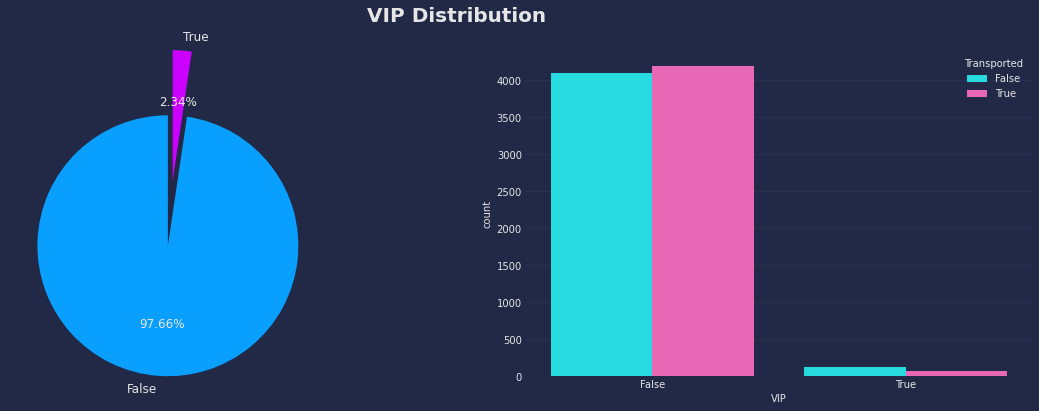

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(20,6))
fig.suptitle('VIP Distribution', size = 20, weight='bold')

sizes = list(df_train['VIP'].value_counts(sort=False))

labels = df_train['VIP'].dropna().unique()
colors = ['#099FFF', '#CC00FF']
explode = (0.25,0.25) 

ax[0].pie(sizes, colors=colors, explode=explode, startangle=90, labels=labels,
       autopct='%1.2f%%', pctdistance=0.6,textprops={'fontsize':12})
sns.countplot(x='VIP', data=df_train, hue='Transported', ax=ax[1])

print(colored("VIP Distribution - ",'green'))
data = pd.DataFrame(df_train['VIP'].value_counts()).reset_index().rename(columns={'index': 'VIP', 'VIP':'Count'})
print(colored(data, 'green'))

plt.show()

<h2><u>INSIGHTS FROM THE GRAPH</u></h2>

* We can observe that VIP has a high false percentage. 
* Also, this feature doesn't look useful as the transported distribution is almost equal for both VIP and non VIP passengers.

<a id='3.9'></a>
## 9. Age
<b>This is a continuos value feature with values ranging from 0 to 79. This feature also contains some null values which we need to take care but first let's check its distribution and dependence on Transported.</b>

Transported Passengers Age Distribution - 
Minimum Age - 0.0
Maximum Age - 78.0
Average Age - 27.74883395522388
Non Transported Passengers Age Distribution - 
Minimum Age - 0.0
Maximum Age - 79.0
Average Age - 29.922858495030763


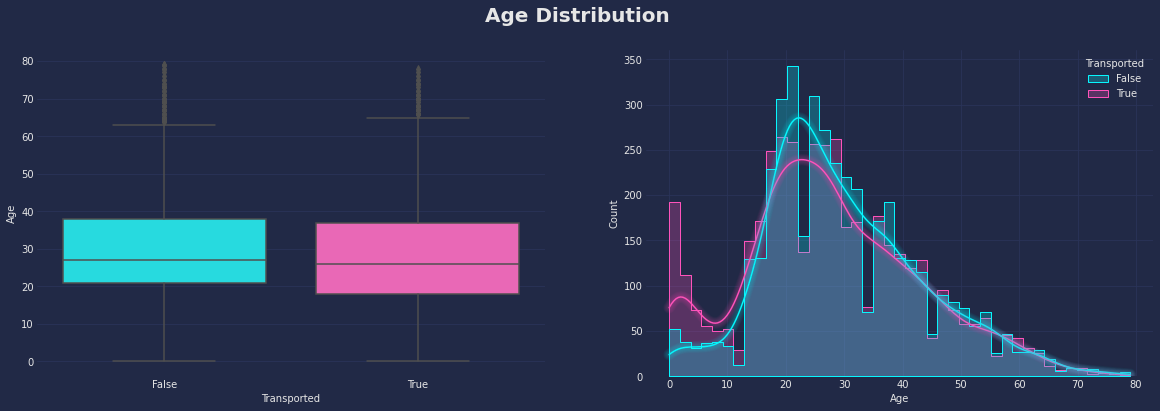

In [18]:
fig, ax = plt.subplots(1, 2, figsize=(20,6))
fig.suptitle('Age Distribution', size = 20, weight='bold')

sns.boxplot(x='Transported', y='Age', data=df_train, ax=ax[0])
sns.histplot(x='Age', element="step", kde=True, data=df_train, hue='Transported', ax=ax[1])

print(colored("Transported Passengers Age Distribution - ", 'magenta'))
print(colored(f"Minimum Age - {df_train[df_train['Transported']==True]['Age'].describe()['min']}", 'magenta'))
print(colored(f"Maximum Age - {df_train[df_train['Transported']==True]['Age'].describe()['max']}", 'magenta'))
print(colored(f"Average Age - {df_train[df_train['Transported']==True]['Age'].describe()['mean']}", 'magenta'))

print(colored("Non Transported Passengers Age Distribution - ", 'blue'))
print(colored(f"Minimum Age - {df_train[df_train['Transported']==False]['Age'].describe()['min']}", 'blue'))
print(colored(f"Maximum Age - {df_train[df_train['Transported']==False]['Age'].describe()['max']}", 'blue'))
print(colored(f"Average Age - {df_train[df_train['Transported']==False]['Age'].describe()['mean']}", 'blue'))

mplcyberpunk.make_lines_glow()

plt.show()

<h2><u>INSIGHTS FROM THE GRAPH</u></h2>

* From the first look we can observe that the distribution of age is almost similar for both transported and non transported passengers. 
* But if we look more carefully, we can oberve that initially the age distribution of transported passengers is high indicating that passengers having age less than 10 have higher chances of getting transported but it is quite opposite for the passengers who are in their 20s.
* But rest the age distribution is quite similar for both classes. 

<a id='3.10'></a>
## 10. RoomService, FoodCourt, ShoppingMall, Spa, VRDeck
<b>These are the columns that contains the amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.These all are continuos feature and we will check their distribution and dependence on Transported.</b>

Percentage of Passengers with no RoomService Billing - 64.16%
Transported Passengers RoomService Billing Distribution - 
Minimum RoomService Billing - 0.0
Maximum RoomService Billing - 3992.0
Average RoomService Billing - 63.09802095459837
Non Transported Passengers RoomService Billing Distribution - 
Minimum RoomService Billing - 0.0
Maximum RoomService Billing - 14327.0
Average RoomService Billing - 389.2660659236424


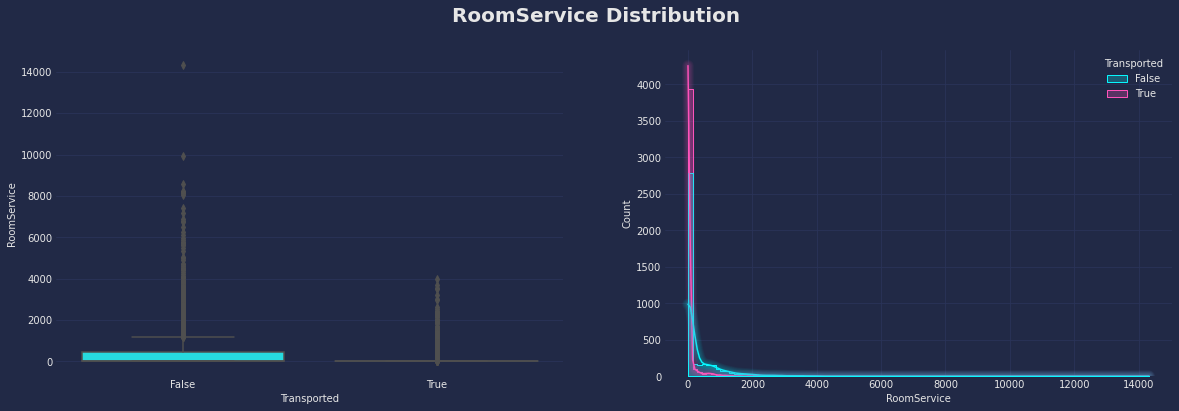

Percentage of Passengers with no FoodCourt Billing - 62.76%
Transported Passengers FoodCourt Billing Distribution - 
Minimum FoodCourt Billing - 0.0
Maximum FoodCourt Billing - 29813.0
Average FoodCourt Billing - 532.6919841084366
Non Transported Passengers FoodCourt Billing Distribution - 
Minimum FoodCourt Billing - 0.0
Maximum FoodCourt Billing - 16856.0
Average FoodCourt Billing - 382.61593004017965


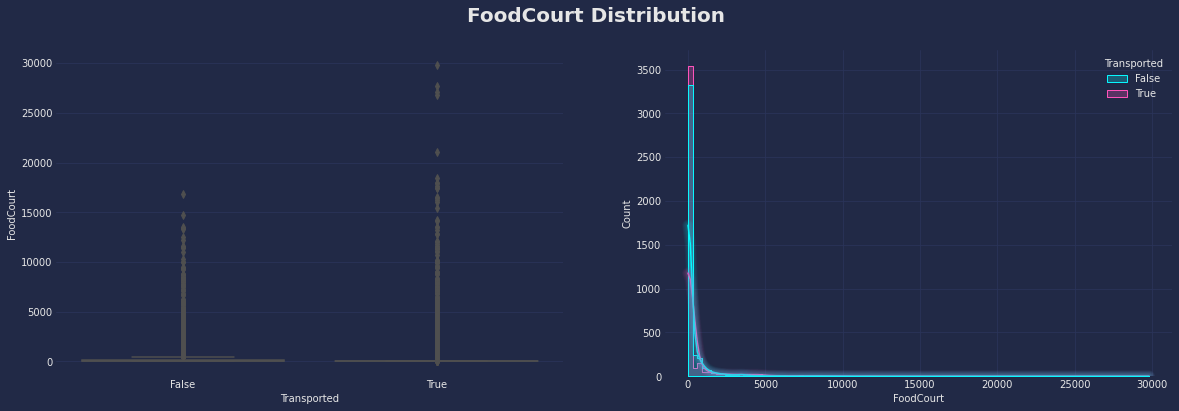

Percentage of Passengers with no ShoppingMall Billing - 64.27%
Transported Passengers ShoppingMall Billing Distribution - 
Minimum ShoppingMall Billing - 0.0
Maximum ShoppingMall Billing - 23492.0
Average ShoppingMall Billing - 179.82997185741087
Non Transported Passengers ShoppingMall Billing Distribution - 
Minimum ShoppingMall Billing - 0.0
Maximum ShoppingMall Billing - 10705.0
Average ShoppingMall Billing - 167.5662165363658


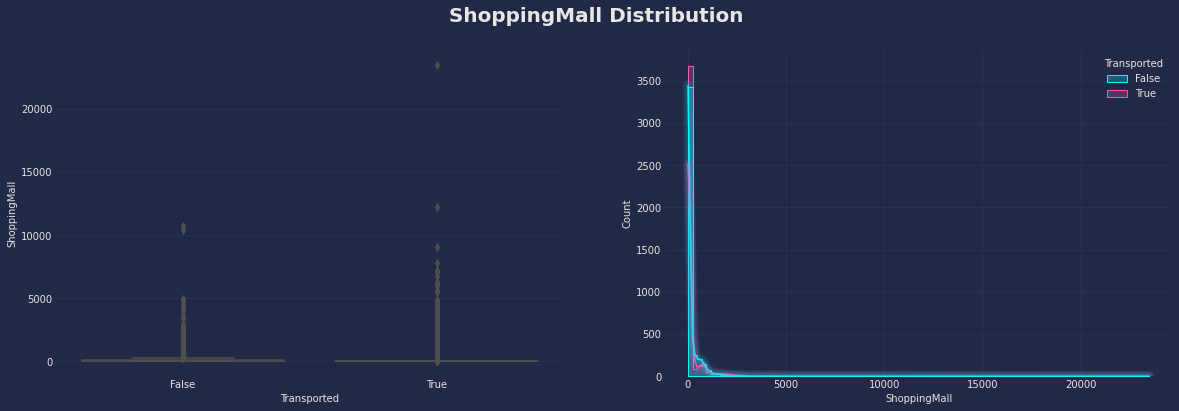

Percentage of Passengers with no Spa Billing - 61.24%
Transported Passengers Spa Billing Distribution - 
Minimum Spa Billing - 0.0
Maximum Spa Billing - 4103.0
Average Spa Billing - 61.675530674131096
Non Transported Passengers Spa Billing Distribution - 
Minimum Spa Billing - 0.0
Maximum Spa Billing - 22408.0
Average Spa Billing - 564.3826663509353


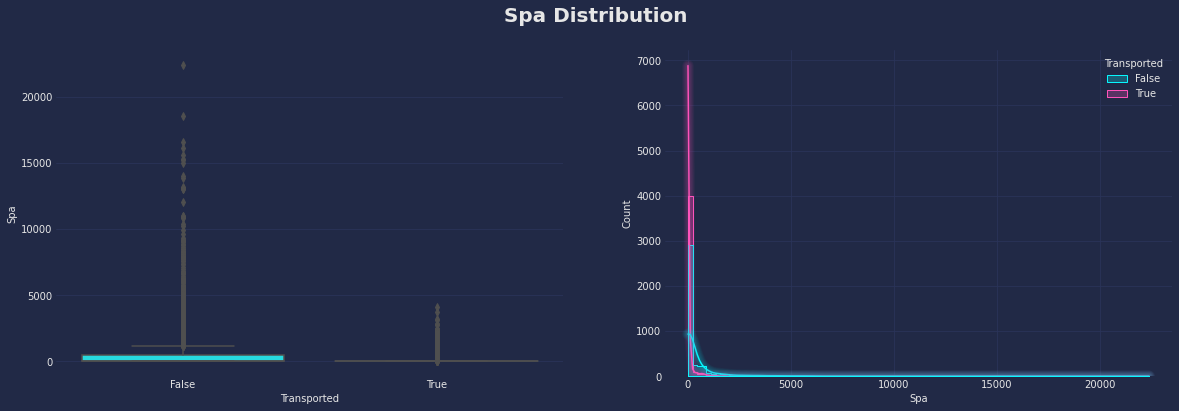

Percentage of Passengers with no VRDeck Billing - 63.21%
Transported Passengers VRDeck Billing Distribution - 
Minimum VRDeck Billing - 0.0
Maximum VRDeck Billing - 5063.0
Average VRDeck Billing - 69.1481308411215
Non Transported Passengers VRDeck Billing Distribution - 
Minimum VRDeck Billing - 0.0
Maximum VRDeck Billing - 24133.0
Average VRDeck Billing - 543.6298224852071


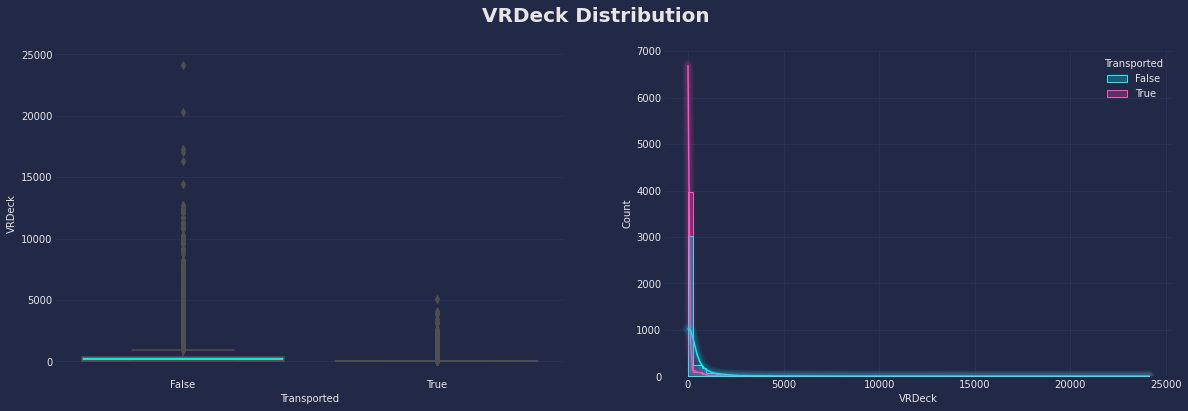

In [19]:
fig, ax = plt.subplots(1, 2, figsize=(20,6))
fig.suptitle('RoomService Distribution', size = 20, weight='bold')

sns.boxplot(x='Transported', y='RoomService', data=df_train, ax=ax[0])
sns.histplot(x='RoomService', element="step", kde=True, data=df_train, hue='Transported', bins=100, ax=ax[1])

print(colored(f"Percentage of Passengers with no RoomService Billing - {len(df_train[df_train['RoomService']==0.0])/len(df_train)*100:.2f}%", 'red'))
print(colored("Transported Passengers RoomService Billing Distribution - ", 'magenta'))
print(colored(f"Minimum RoomService Billing - {df_train[df_train['Transported']==True]['RoomService'].describe()['min']}", 'magenta'))
print(colored(f"Maximum RoomService Billing - {df_train[df_train['Transported']==True]['RoomService'].describe()['max']}", 'magenta'))
print(colored(f"Average RoomService Billing - {df_train[df_train['Transported']==True]['RoomService'].describe()['mean']}", 'magenta'))

print(colored("Non Transported Passengers RoomService Billing Distribution - ", 'blue'))
print(colored(f"Minimum RoomService Billing - {df_train[df_train['Transported']==False]['RoomService'].describe()['min']}", 'blue'))
print(colored(f"Maximum RoomService Billing - {df_train[df_train['Transported']==False]['RoomService'].describe()['max']}", 'blue'))
print(colored(f"Average RoomService Billing - {df_train[df_train['Transported']==False]['RoomService'].describe()['mean']}", 'blue'))

mplcyberpunk.make_lines_glow()

plt.show()

fig, ax = plt.subplots(1, 2, figsize=(20,6))
fig.suptitle('FoodCourt Distribution', size = 20, weight='bold')

sns.boxplot(x='Transported', y='FoodCourt', data=df_train, ax=ax[0])
sns.histplot(x='FoodCourt', element="step", kde=True, data=df_train, hue='Transported', bins=100, ax=ax[1])

print(colored(f"Percentage of Passengers with no FoodCourt Billing - {len(df_train[df_train['FoodCourt']==0.0])/len(df_train)*100:.2f}%", 'red'))
print(colored("Transported Passengers FoodCourt Billing Distribution - ", 'magenta'))
print(colored(f"Minimum FoodCourt Billing - {df_train[df_train['Transported']==True]['FoodCourt'].describe()['min']}", 'magenta'))
print(colored(f"Maximum FoodCourt Billing - {df_train[df_train['Transported']==True]['FoodCourt'].describe()['max']}", 'magenta'))
print(colored(f"Average FoodCourt Billing - {df_train[df_train['Transported']==True]['FoodCourt'].describe()['mean']}", 'magenta'))

print(colored("Non Transported Passengers FoodCourt Billing Distribution - ", 'blue'))
print(colored(f"Minimum FoodCourt Billing - {df_train[df_train['Transported']==False]['FoodCourt'].describe()['min']}", 'blue'))
print(colored(f"Maximum FoodCourt Billing - {df_train[df_train['Transported']==False]['FoodCourt'].describe()['max']}", 'blue'))
print(colored(f"Average FoodCourt Billing - {df_train[df_train['Transported']==False]['FoodCourt'].describe()['mean']}", 'blue'))


mplcyberpunk.make_lines_glow()

plt.show()

fig, ax = plt.subplots(1, 2, figsize=(20,6))
fig.suptitle('ShoppingMall Distribution', size = 20, weight='bold')

sns.boxplot(x='Transported', y='ShoppingMall', data=df_train, ax=ax[0])
sns.histplot(x='ShoppingMall', element="step", kde=True, data=df_train, hue='Transported', bins=100, ax=ax[1])

print(colored(f"Percentage of Passengers with no ShoppingMall Billing - {len(df_train[df_train['ShoppingMall']==0.0])/len(df_train)*100:.2f}%", 'red'))
print(colored("Transported Passengers ShoppingMall Billing Distribution - ", 'magenta'))
print(colored(f"Minimum ShoppingMall Billing - {df_train[df_train['Transported']==True]['ShoppingMall'].describe()['min']}", 'magenta'))
print(colored(f"Maximum ShoppingMall Billing - {df_train[df_train['Transported']==True]['ShoppingMall'].describe()['max']}", 'magenta'))
print(colored(f"Average ShoppingMall Billing - {df_train[df_train['Transported']==True]['ShoppingMall'].describe()['mean']}", 'magenta'))

print(colored("Non Transported Passengers ShoppingMall Billing Distribution - ", 'blue'))
print(colored(f"Minimum ShoppingMall Billing - {df_train[df_train['Transported']==False]['ShoppingMall'].describe()['min']}", 'blue'))
print(colored(f"Maximum ShoppingMall Billing - {df_train[df_train['Transported']==False]['ShoppingMall'].describe()['max']}", 'blue'))
print(colored(f"Average ShoppingMall Billing - {df_train[df_train['Transported']==False]['ShoppingMall'].describe()['mean']}", 'blue'))


mplcyberpunk.make_lines_glow()

plt.show()

fig, ax = plt.subplots(1, 2, figsize=(20,6))
fig.suptitle('Spa Distribution', size = 20, weight='bold')

sns.boxplot(x='Transported', y='Spa', data=df_train, ax=ax[0])
sns.histplot(x='Spa', element="step", kde=True, data=df_train, hue='Transported', bins=100, ax=ax[1])

print(colored(f"Percentage of Passengers with no Spa Billing - {len(df_train[df_train['Spa']==0.0])/len(df_train)*100:.2f}%", 'red'))
print(colored("Transported Passengers Spa Billing Distribution - ", 'magenta'))
print(colored(f"Minimum Spa Billing - {df_train[df_train['Transported']==True]['Spa'].describe()['min']}", 'magenta'))
print(colored(f"Maximum Spa Billing - {df_train[df_train['Transported']==True]['Spa'].describe()['max']}", 'magenta'))
print(colored(f"Average Spa Billing - {df_train[df_train['Transported']==True]['Spa'].describe()['mean']}", 'magenta'))

print(colored("Non Transported Passengers Spa Billing Distribution - ", 'blue'))
print(colored(f"Minimum Spa Billing - {df_train[df_train['Transported']==False]['Spa'].describe()['min']}", 'blue'))
print(colored(f"Maximum Spa Billing - {df_train[df_train['Transported']==False]['Spa'].describe()['max']}", 'blue'))
print(colored(f"Average Spa Billing - {df_train[df_train['Transported']==False]['Spa'].describe()['mean']}", 'blue'))

mplcyberpunk.make_lines_glow()

plt.show()

fig, ax = plt.subplots(1, 2, figsize=(20,6))
fig.suptitle('VRDeck Distribution', size = 20, weight='bold')

sns.boxplot(x='Transported', y='VRDeck', data=df_train, ax=ax[0])
sns.histplot(x='VRDeck', element="step", kde=True, data=df_train, hue='Transported', bins=100, ax=ax[1])

print(colored(f"Percentage of Passengers with no VRDeck Billing - {len(df_train[df_train['VRDeck']==0.0])/len(df_train)*100:.2f}%", 'red'))
print(colored("Transported Passengers VRDeck Billing Distribution - ", 'magenta'))
print(colored(f"Minimum VRDeck Billing - {df_train[df_train['Transported']==True]['VRDeck'].describe()['min']}", 'magenta'))
print(colored(f"Maximum VRDeck Billing - {df_train[df_train['Transported']==True]['VRDeck'].describe()['max']}", 'magenta'))
print(colored(f"Average VRDeck Billing - {df_train[df_train['Transported']==True]['VRDeck'].describe()['mean']}", 'magenta'))

print(colored("Non Transported Passengers VRDeck Billing Distribution - ", 'blue'))
print(colored(f"Minimum VRDeck Billing - {df_train[df_train['Transported']==False]['VRDeck'].describe()['min']}", 'blue'))
print(colored(f"Maximum VRDeck Billing - {df_train[df_train['Transported']==False]['VRDeck'].describe()['max']}", 'blue'))
print(colored(f"Average VRDeck Billing - {df_train[df_train['Transported']==False]['VRDeck'].describe()['mean']}", 'blue'))

mplcyberpunk.make_lines_glow()

plt.show()

<h2><u>INSIGHTS FROM THE GRAPH</u></h2>

* We can clearly observe that all the distributions are centered towards zero. 
* There are more than 60% passengers in each distribution who have not paid for that service.
* Also, there are few cases with very high billings (looks like an outlier)
* It looks like using these features directly for modelling won't help and we might need to create new features from these to have better performance.

### We have observed the distribution of these continuos features and looked how these affect the Transported. But still we need more clarity on these features. So next we will check their correlation with some other features like Age and VIP and can get to know how much they are correlated and affect Transported.

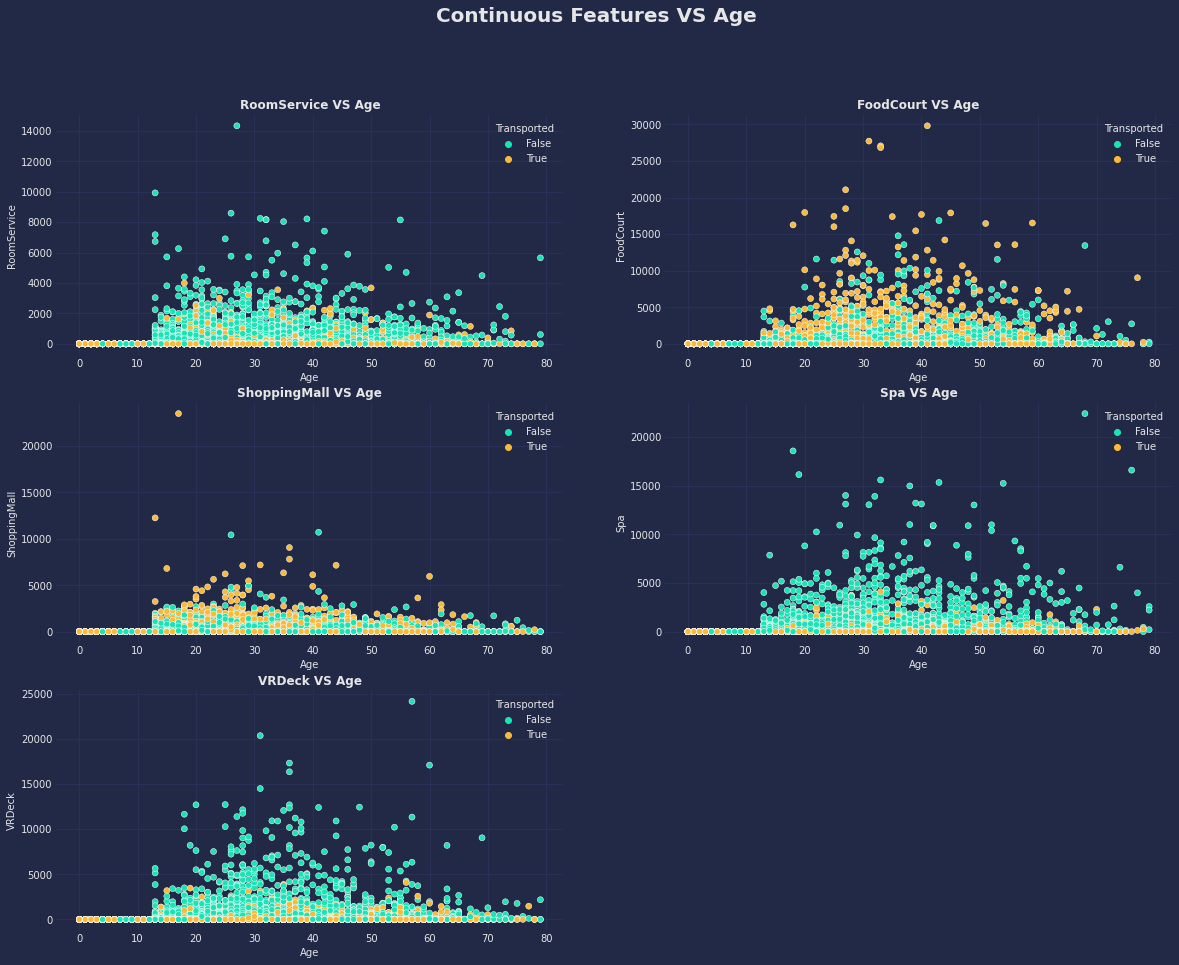

In [20]:
fig, ax = plt.subplots(3, 2, figsize=(20, 15))
fig.suptitle('Continuous Features VS Age', size = 20, weight='bold')
fig.delaxes(ax[2][1])

df_temp = df_train.iloc[:, 5:12]
columns = df_temp.columns[2:]
for i, col in enumerate(columns):
    sns.scatterplot(x='Age', y=col, hue='Transported', data=df_train, ax=fig.axes[i], palette='turbo')
    fig.axes[i].set_title(f'{col} VS Age', weight='bold')
plt.show()

<h2><u>INSIGHTS FROM THE GRAPH</u></h2>

* As expected, the expendicture of each feature is almost zero for passengers with age less than 10.
* The distribution of the transported and non-transported is quite similar with respect to Age in the case FoodCourt and ShoppingMall.
* Whereas we can observe that non-transported passengers have spent more in the case of RoomService, Spa and VRDeck.

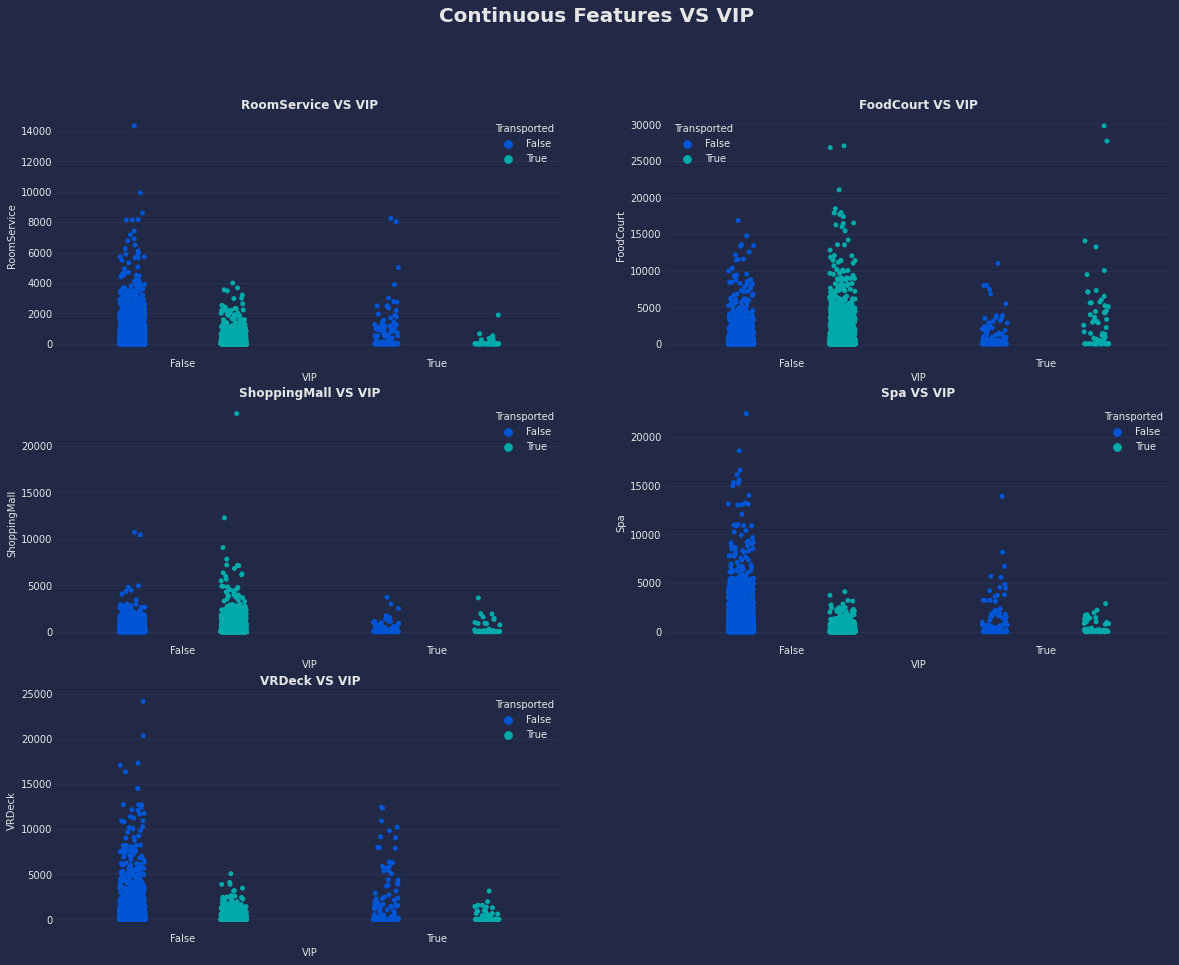

In [21]:
fig, ax = plt.subplots(3, 2, figsize=(20, 15))
fig.suptitle('Continuous Features VS VIP', size = 20, weight='bold')
fig.delaxes(ax[2][1])

for i, col in enumerate(columns):
    sns.stripplot(x="VIP", y=col, hue='Transported', data=df_train, dodge=True, ax=fig.axes[i], palette='winter')
    fig.axes[i].set_title(f'{col} VS VIP', weight='bold')
plt.show()

<h2><u>INSIGHTS FROM THE GRAPH</u></h2>

* Although, it is expected that VIP passengers must have spent more than normal passengers, but as the count of VIP passengers is very less, we can't observe the same from the above plots.
* Apart from that the distribution looks quite similar for each feature for both VIP and non-VIP passengers.

### As I stated before, we can create new features from these 5 continuous features to get more valuable dataset. 
### New Features :- 
1) Total Expenses - Sum of all the 5 expenses.<br>
2) NoSpent - Whether the passenger has spent anything or not.

Total_Expenses Distribution - 
Minimum Total_Expenses - 0.0
Maximum Total_Expenses - 35987.0
Average Total_Expenses - 1440.8663292304152


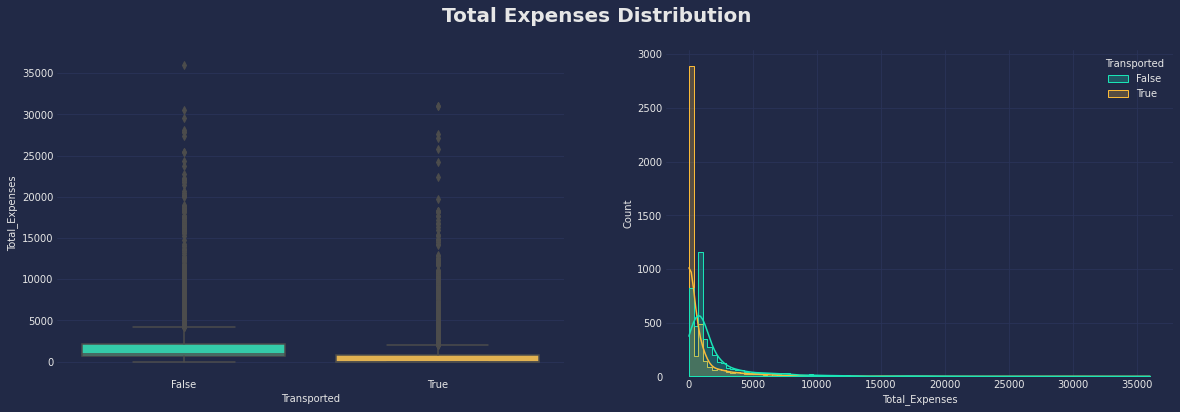

NoSpent Distribution - 
   NoSpent  Count
0    False   5040
1     True   3653


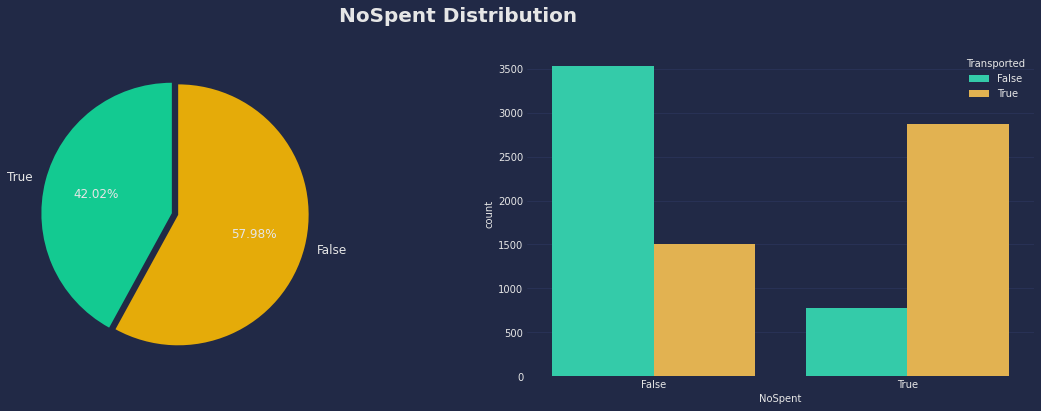

In [22]:
df_train['Total_Expenses'] = df_train[df_temp.columns[2:]].sum(axis=1)
df_train['NoSpent'] = df_train['Total_Expenses']==0

fig, ax = plt.subplots(1, 2, figsize=(20, 6))
fig.suptitle('Total Expenses Distribution', size = 20, weight='bold')

sns.boxplot(x='Transported', y='Total_Expenses', data=df_train, ax=ax[0], palette='turbo')
sns.histplot(x='Total_Expenses', element="step", kde=True, data=df_train, hue='Transported', bins=100, ax=ax[1], palette='turbo')

print(colored("Total_Expenses Distribution - ", 'cyan'))
print(colored(f"Minimum Total_Expenses - {df_train['Total_Expenses'].describe()['min']}", 'cyan'))
print(colored(f"Maximum Total_Expenses - {df_train['Total_Expenses'].describe()['max']}", 'cyan'))
print(colored(f"Average Total_Expenses - {df_train['Total_Expenses'].describe()['mean']}", 'cyan'))

plt.show()

fig, ax = plt.subplots(1, 2, figsize=(20,6))
fig.suptitle('NoSpent Distribution', size = 20, weight='bold')

sizes = list(df_train['NoSpent'].value_counts(sort=False))

labels = df_train['NoSpent'].dropna().unique()
colors = ['#13CA91', '#e5ab09']
explode = (0.0,0.05) 

ax[0].pie(sizes, colors=colors, explode=explode, startangle=90, labels=labels,
       autopct='%1.2f%%', pctdistance=0.6,textprops={'fontsize':12})
sns.countplot(x='NoSpent', data=df_train, hue='Transported', ax=ax[1], palette='turbo')

print(colored("NoSpent Distribution - ",'cyan'))
data = pd.DataFrame(df_train['NoSpent'].value_counts()).reset_index().rename(columns={'index': 'NoSpent', 'NoSpent':'Count'})
print(colored(data, 'cyan'))

plt.show()

<h2><u>INSIGHTS FROM THE GRAPH</u></h2>

* We can observe that the total expenses is still mostly near to zero and the distribution is almost same for both transported and non-transported passengers.
* On the other hand we can observe a direct relationship with the NoSpent and Transported feature such that the person who hasn't spent anything has higher chance of getting transported.

<a id='4'></a>
# Data Pre-Processing
After exploring the data, now it's time to process the data so that it can be used to train the model. <br>
I have already performed all the feature engineering in the EDA, so it is not included in the processing.

In [23]:
# Let's have a quick look at the data
df_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Group,GroupSize,deck,side,Total_Expenses,NoSpent
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,1,1,B,P,0.0,True
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,2,1,F,S,736.0,False
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,3,2,A,S,10383.0,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,3,2,A,S,5176.0,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,4,1,F,S,1091.0,False


<a id='4.1'></a>
## Handling Missing Values
As we already know, there are missing values in almost all the columns. So either we can drop all the rows with the null values or we can fill these null values. <br>
There aren't many missing values, but it's a good idea to enter these values. This gives you more data and allows you to create better models. There are multiple ways to fill these null values depending upon each column. But I will follow an easier approach by filling the null values by either it's median or mode depending upon the column.

In [24]:
print(colored(f"Number of missing values before - {df_train.isna().sum().sum()}", 'red'))

for col in df_train.columns:
    if col == 'Age':
        df_train[col].fillna(df_train[col].median(), inplace=True)
    else:
        df_train[col].fillna(df_train[col].mode()[0], inplace=True)
        
print(colored(f"Number of missing values after - {df_train.isna().sum().sum()}", 'blue'))

Number of missing values before - 2125
Number of missing values after - 0


<a id='4.2'></a>
## Dropping unwanted columns.

In [25]:
df_train.drop(['PassengerId', 'Cabin', 'Group', 'Name'], axis=1, inplace=True)

<a id='4.3'></a>
## Encoding
In machine learning models, all input and output variables must be numeric. This means that if our data contains values in string or boolean format, they must be converted into numerical format before training the model.

In [26]:
for col in df_train.columns[df_train.dtypes == object]:
    encoder = LabelEncoder()
    df_train[col] = encoder.fit_transform(df_train[col])
    
for col in df_train.columns[df_train.dtypes == bool]:
    df_train[col] = df_train[col].astype('int')

<a id='4.4'></a>
## Splitting the data
Lastly, we assign our input and the target variables and then split the data into train and validation set.

In [27]:
X = df_train.drop('Transported', axis=1)
y = df_train['Transported']
X_train, X_valid, y_train, y_valid = train_test_split(X, y, stratify=y, test_size=0.2, random_state=5)

print(colored(f"Number of rows in training set - {len(X_train)}", 'cyan'))
print(colored(f"Number of rows in validation set - {len(X_valid)}", 'magenta'))

Number of rows in training set - 6954
Number of rows in validation set - 1739


<div class="alert alert-block alert-warning">
    <h2 align='center'>⚠ WORK IN PROGRESS ⚠</h2>
    <h2 align='center'>Please consider upvoting the kernel if you found it useful.</h2>
</div>